<a href="https://colab.research.google.com/github/YousraAshour/DryBeans_Competition/blob/main/DryBeans_Trial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install tensorflow
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.decomposition import PCA
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 7.9 MB/s 


In [25]:
Data=pd.read_csv('/content/train.csv')

In [26]:
Data

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,SEKER
10830,10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,DERMASON
10831,10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,CALI
10832,10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793,SIRA


In [27]:
Labels=Data['y']

In [28]:
Labels

0           HOROZ
1           SEKER
2        DERMASON
3        DERMASON
4            SIRA
           ...   
10829       SEKER
10830    DERMASON
10831        CALI
10832        SIRA
10833    DERMASON
Name: y, Length: 10834, dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder


In [30]:
le=LabelEncoder()
Labels=le.fit_transform(Labels)

In [31]:
Labels=Labels.reshape(-1,1)

In [32]:
Data=Data.drop(['y','ID'],axis=1)

In [33]:
Data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708
10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646
10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412
10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793


In [34]:
pd.DataFrame(Labels).value_counts()

3    2837
6    2109
5    1621
4    1488
2    1304
0    1057
1     418
dtype: int64

In [35]:
# Data=Data[['Area','Perimeter','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter','roundness','ShapeFactor1','ShapeFactor2']]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
oversample=SMOTE()
Data,Labels=oversample.fit_resample(Data,Labels)

In [39]:
features_train, features_test, labels_train, labels_test = train_test_split(Data,Labels,test_size=0.3,random_state=100)

In [40]:
pca=PCA(n_components=8)
features_train=pca.fit_transform(features_train)
features_test=pca.transform(features_test)

In [41]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(features_train)
# features_train=df_scaled

In [42]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(features_train)
features_train=df_scaled

In [43]:
df_scaled = scaler.transform(features_test)
features_test=df_scaled

In [44]:
from sklearn.metrics import f1_score

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(8,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

In [47]:
features_test.shape

(5958, 8)

In [48]:
labels_test.shape

(5958,)

In [49]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

early_stopp = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')

history = model.fit(features_train, labels_train, epochs=100, 
                    validation_data=(features_test, labels_test), 
                    batch_size=32,callbacks=[early_stopp])

Epoch 1/100
435/435 [==============================] - 7s 11ms/step - loss: 1.0948 - accuracy: 0.6398 - val_loss: 0.3100 - val_accuracy: 0.9162
Epoch 2/100
435/435 [==============================] - 4s 10ms/step - loss: 0.3759 - accuracy: 0.8873 - val_loss: 0.2268 - val_accuracy: 0.9267
Epoch 3/100
435/435 [==============================] - 4s 9ms/step - loss: 0.2998 - accuracy: 0.9091 - val_loss: 0.2064 - val_accuracy: 0.9335
Epoch 4/100
435/435 [==============================] - 3s 7ms/step - loss: 0.2726 - accuracy: 0.9161 - val_loss: 0.1927 - val_accuracy: 0.9376
Epoch 5/100
435/435 [==============================] - 2s 5ms/step - loss: 0.2515 - accuracy: 0.9246 - val_loss: 0.1902 - val_accuracy: 0.9367
Epoch 6/100
435/435 [==============================] - 2s 5ms/step - loss: 0.2363 - accuracy: 0.9274 - val_loss: 0.1813 - val_accuracy: 0.9389
Epoch 7/100
435/435 [==============================] - 2s 5ms/step - loss: 0.2295 - accuracy: 0.9302 - val_loss: 0.1812 - val_accuracy: 0.93

In [50]:
#extract results from history

train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss)+1)

In [51]:
max(val_acc)

0.9545149207115173

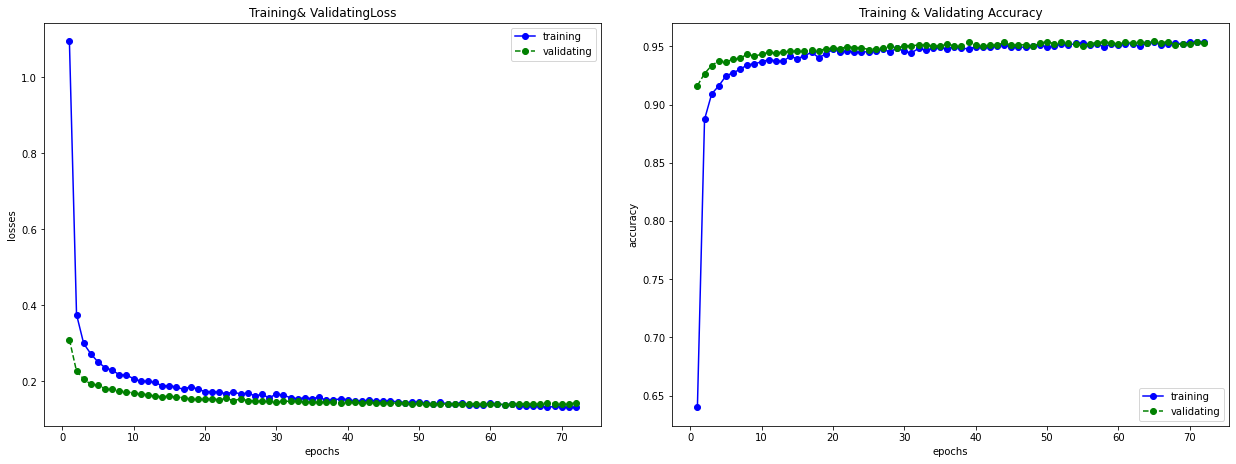

In [52]:
### get some results and Visualization from history
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 7))
fig.tight_layout(pad=4)  ## to avoid overlaping of titles in subplots (try comment it you will know)

plt.sca(ax[0])
plt.plot(epochs, train_loss, 'bo-', label='training')
plt.plot(epochs, val_loss, 'go--', label='validating')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('Training& ValidatingLoss')
plt.legend()

plt.sca(ax[1])
plt.plot(epochs, train_acc, 'bo-', label='training')
plt.plot(epochs, val_acc, 'go--', label='validating')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training & Validating Accuracy')

plt.legend(loc='lower right')
plt.show()

In [53]:
from sklearn.metrics import f1_score

nums_predictions = np.argmax(model.predict(features_test), axis=-1)
print(" ====> ",f1_score(nums_predictions, labels_test,average="micro"))

 ====>  0.9531722054380665


In [54]:
import tensorflow as tf
cm=tf.math.confusion_matrix(
    labels_test,
    nums_predictions,
    num_classes=7)

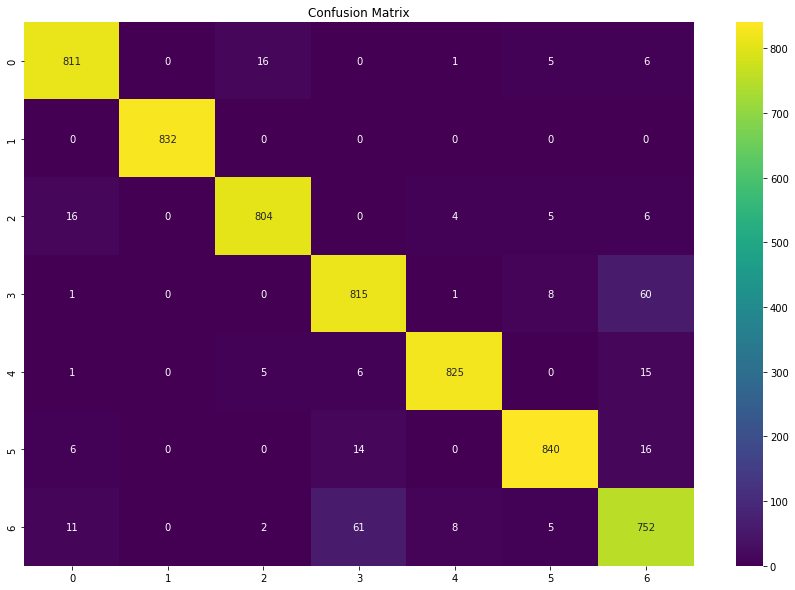

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap='viridis',fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [56]:
#Load test data
test=pd.read_csv('./test.csv')

FileNotFoundError: ignored

In [57]:
test2=test.drop(['ID'],axis=1)

NameError: ignored

In [58]:
X_test1=pca.transform(test2)
scaled_test_data1 = scaler.transform(X_test1)

NameError: ignored

In [59]:
y_pred = np.argmax(model.predict(scaled_test_data1), axis=-1)
y_pred=pd.DataFrame(y_pred)

NameError: ignored

In [60]:
y_pred

NameError: ignored

In [61]:
y_pred=le.inverse_transform(y_pred)

NameError: ignored

In [ ]:
y_pred=pd.DataFrame(y_pred)

In [ ]:
y_pred

In [ ]:
df_final=pd.DataFrame(test['ID'])
df_final=pd.concat([df_final,y_pred],axis=1)
df_final.columns=['ID','y']
df_final

In [ ]:
df_final.to_csv("df_nn_drp_out_pca8.csv",index=False)